## Group 1 Project: Alzheimer's Prediction 

### Import Libraries and Read Data

In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# read data into a data frame
df = pd.read_csv("alzheimers_prediction_dataset.csv")
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


### Data Cleaning and Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [3]:
# see column names
col = df.columns
col

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [4]:
#number of unique values per column
print(df.nunique())

Country                                  20
Age                                      45
Gender                                    2
Education Level                          20
BMI                                     166
Physical Activity Level                   3
Smoking Status                            3
Alcohol Consumption                       3
Diabetes                                  2
Hypertension                              2
Cholesterol Level                         2
Family History of Alzheimer’s             2
Cognitive Test Score                     70
Depression Level                          3
Sleep Quality                             3
Dietary Habits                            3
Air Pollution Exposure                    3
Employment Status                         3
Marital Status                            3
Genetic Risk Factor (APOE-ε4 allele)      2
Social Engagement Level                   3
Income Level                              3
Stress Levels                   

In [5]:
# Check variance of numeric variables--If low variance, remove variable

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute variance
feature_variance = numeric_df.var()

# Print sorted variance values
print("\nFeature Variance (Sorted):\n")
print(feature_variance.sort_values())


Feature Variance (Sorted):

BMI                      22.702171
Education Level          33.143281
Age                     168.499818
Cognitive Test Score    406.153382
dtype: float64


none of the numeric variables seem to be low variance. We will keep them in the df.

In [6]:
# Check for duplicated rows

duplicated_rows = df[df.duplicated()]

# Print duplicated rows if any exist
print(f"\nTotal Duplicated Rows: {len(duplicated_rows)}\n")
if not duplicated_rows.empty:
    print(duplicated_rows)


Total Duplicated Rows: 0



no duplicated rows need to be removed.

In [7]:
#First, encode all binary variables

#List of binary variables
binary_cols = [
    'Gender', 
    'Diabetes', 
    'Hypertension',
    'Cholesterol Level', 
    'Family History of Alzheimer’s', 
    'Genetic Risk Factor (APOE-ε4 allele)', 
    'Urban vs Rural Living',
    'Alzheimer’s Diagnosis'
]
    
# Define mapping for binary variables
binary_mapping = {
    'Gender': {'Female': 0, 'Male': 1},
    'Diabetes': {'No': 0, 'Yes': 1},
    'Hypertension': {'No': 0, 'Yes': 1},
    'Cholesterol Level': {'Normal': 0, 'High': 1},
    'Family History of Alzheimer’s': {'No': 0, 'Yes': 1},
    'Genetic Risk Factor (APOE-ε4 allele)': {'No': 0, 'Yes': 1},
    'Urban vs Rural Living': {'Rural': 0, 'Urban': 1},
    'Alzheimer’s Diagnosis': {'No': 0, 'Yes': 1}
}

# Ensure column values are standardized before mapping
for col in binary_cols:
    if col in df.columns:  # Check if column exists
        df[col] = df[col].astype(str).str.strip().str.lower().map(
            {k.lower(): v for k, v in binary_mapping[col].items()}  # Normalize mapping keys
        )

# Output the first few rows to check encoding
print(df.head())

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90       1                1  33.0                  Medium   
1     Argentina   72       1                7  29.9                  Medium   
2  South Africa   86       0               19  22.9                    High   
3         China   53       1               17  31.2                     Low   
4        Sweden   58       0                3  30.0                    High   

  Smoking Status Alcohol Consumption  Diabetes  Hypertension  ...  \
0          Never        Occasionally         0             0  ...   
1         Former               Never         0             0  ...   
2        Current        Occasionally         0             1  ...   
3          Never           Regularly         1             0  ...   
4         Former               Never         1             0  ...   

   Dietary Habits  Air Pollution Exposure  Employment Status Marital Status  \
0         Healthy              

In [8]:
# Check Binary variable encoding: Print unique values after encoding
for col in binary_cols:
    print(f"Encoded unique values in '{col}': {df[col].unique()}\n")

# Check for any NaN values
print("Remaining NaN values per column:\n", df[binary_cols].isna().sum())

Encoded unique values in 'Gender': [1 0]

Encoded unique values in 'Diabetes': [0 1]

Encoded unique values in 'Hypertension': [0 1]

Encoded unique values in 'Cholesterol Level': [0 1]

Encoded unique values in 'Family History of Alzheimer’s': [0 1]

Encoded unique values in 'Genetic Risk Factor (APOE-ε4 allele)': [0 1]

Encoded unique values in 'Urban vs Rural Living': [1 0]

Encoded unique values in 'Alzheimer’s Diagnosis': [0 1]

Remaining NaN values per column:
 Gender                                  0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Genetic Risk Factor (APOE-ε4 allele)    0
Urban vs Rural Living                   0
Alzheimer’s Diagnosis                   0
dtype: int64


In [9]:
# Encode ordinal variables

# List of ordinal variables
ordinal_cols = {
    'Physical Activity Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Smoking Status': {'Never': 0, 'Former': 1, 'Current': 2},
    'Alcohol Consumption': {'Never': 0, 'Occasionally': 1, 'Regularly': 2},
    'Depression Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Sleep Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Dietary Habits': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2},
    'Air Pollution Exposure': {'Low': 0, 'Medium': 1, 'High': 2},
    'Social Engagement Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Stress Levels': {'Low': 0, 'Medium': 1, 'High': 2}
}

# Apply ordinal encoding
for col, mapping in ordinal_cols.items():
    if col in df.columns:  # Ensure the column exists in DataFrame
        df[col] = df[col].astype(str).str.strip().str.lower().map(
            {k.lower(): v for k, v in mapping.items()}  # Normalize mapping keys
        )
print(df.head())

        Country  Age  Gender  Education Level   BMI  Physical Activity Level  \
0         Spain   90       1                1  33.0                        1   
1     Argentina   72       1                7  29.9                        1   
2  South Africa   86       0               19  22.9                        2   
3         China   53       1               17  31.2                        0   
4        Sweden   58       0                3  30.0                        2   

   Smoking Status  Alcohol Consumption  Diabetes  Hypertension  ...  \
0               0                    1         0             0  ...   
1               1                    0         0             0  ...   
2               2                    1         0             1  ...   
3               0                    2         1             0  ...   
4               1                    0         1             0  ...   

   Dietary Habits  Air Pollution Exposure  Employment Status  Marital Status  \
0           

In [10]:
# Check ordinal variable encoding: Print unique values after encoding
for col in ordinal_cols.keys():
    if col in df.columns:
        print(f"Encoded unique values in '{col}': {sorted(df[col].unique())}\n")

# Check for NaN values
print("Remaining NaN values per column:\n", df[list(ordinal_cols.keys())].isna().sum())

Encoded unique values in 'Physical Activity Level': [0, 1, 2]

Encoded unique values in 'Smoking Status': [0, 1, 2]

Encoded unique values in 'Alcohol Consumption': [0, 1, 2]

Encoded unique values in 'Depression Level': [0, 1, 2]

Encoded unique values in 'Sleep Quality': [0, 1, 2]

Encoded unique values in 'Dietary Habits': [0, 1, 2]

Encoded unique values in 'Air Pollution Exposure': [0, 1, 2]

Encoded unique values in 'Social Engagement Level': [0, 1, 2]

Encoded unique values in 'Income Level': [0, 1, 2]

Encoded unique values in 'Stress Levels': [0, 1, 2]

Remaining NaN values per column:
 Physical Activity Level    0
Smoking Status             0
Alcohol Consumption        0
Depression Level           0
Sleep Quality              0
Dietary Habits             0
Air Pollution Exposure     0
Social Engagement Level    0
Income Level               0
Stress Levels              0
dtype: int64


In [11]:
#Encode nominal variables

# Define the categorical columns
categorical_cols = ['Employment Status', 'Marital Status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop=None, sparse_output=False) 

# Fit and transform the categorical data
encoded_array = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded columns with the original DataFrame (dropping the original categorical columns)
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Display updated columns
print("Updated DataFrame columns after One-Hot Encoding:")
print(df.head())

Updated DataFrame columns after One-Hot Encoding:
        Country  Age  Gender  Education Level   BMI  Physical Activity Level  \
0         Spain   90       1                1  33.0                        1   
1     Argentina   72       1                7  29.9                        1   
2  South Africa   86       0               19  22.9                        2   
3         China   53       1               17  31.2                        0   
4        Sweden   58       0                3  30.0                        2   

   Smoking Status  Alcohol Consumption  Diabetes  Hypertension  ...  \
0               0                    1         0             0  ...   
1               1                    0         0             0  ...   
2               2                    1         0             1  ...   
3               0                    2         1             0  ...   
4               1                    0         1             0  ...   

   Income Level  Stress Levels  Urban vs R

In [12]:
#encode country variable

# Frequency Encoding: Replace country with its occurrence percentage in the dataset
df.insert(df.columns.get_loc('Country') + 1, 'Country_Frequency', df['Country'].map(df['Country'].value_counts() / len(df)))

# Drop the original 'Country' column
df.drop(columns=['Country'], inplace=True)

print(df.head())

   Country_Frequency  Age  Gender  Education Level   BMI  \
0           0.049783   90       1                1  33.0   
1           0.050227   72       1                7  29.9   
2           0.050617   86       0               19  22.9   
3           0.048356   53       1               17  31.2   
4           0.049661   58       0                3  30.0   

   Physical Activity Level  Smoking Status  Alcohol Consumption  Diabetes  \
0                        1               0                    1         0   
1                        1               1                    0         0   
2                        2               2                    1         0   
3                        0               0                    2         1   
4                        2               1                    0         1   

   Hypertension  ...  Income Level  Stress Levels  Urban vs Rural Living  \
0             0  ...             1              2                      1   
1             0  ...    

### Class Distribution Analysis

Class Distribution of Alzheimer’s Diagnosis:
Class 0: 43570 samples (58.65%)
Class 1: 30713 samples (41.35%)


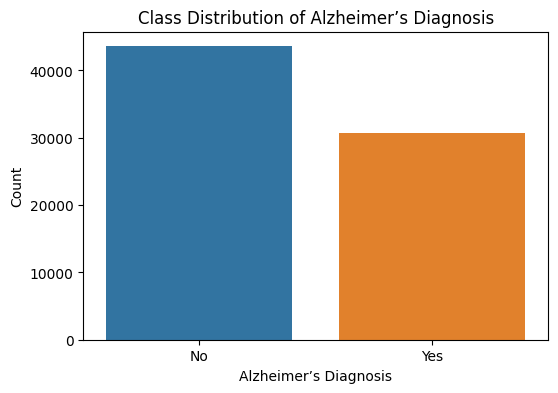

In [14]:
#Check for class imbalance

# Compute class distribution
class_counts = df['Alzheimer’s Diagnosis'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

# Print class distribution with percentages
print('Class Distribution of Alzheimer’s Diagnosis:')
for label, count, percentage in zip(class_counts.index, class_counts.values, class_percentages.values):
    print(f"Class {label}: {count} samples ({percentage:.2f}%)")

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, legend=False)
plt.xlabel('Alzheimer’s Diagnosis')
plt.ylabel('Count')
plt.title('Class Distribution of Alzheimer’s Diagnosis')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Assuming 0 = No, 1 = Yes
plt.show()

The number of observations from individuals who were not diagnosed with Alzheimer's is 17.3% greater than the number of observations from individuals with an Alzheimer's diagnosis. This is only a moderate class imbalance. We can train our models on the original data, and then consider resampling methods to improve our model if the minority class, Class 1 (Alzheimer’s), has poor recall.